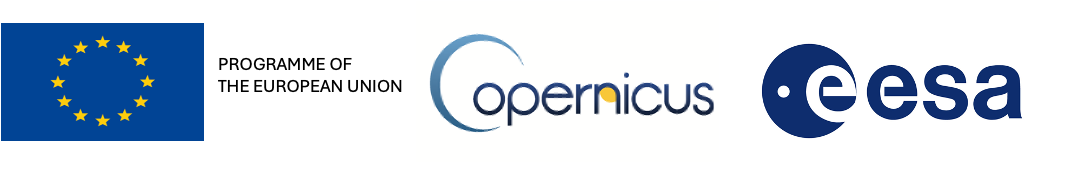

# SENTINEL-1 L1 SLC TOPSAR Product Format Prototype

## Table of Contents
1. [Introduction](#Introduction)
2. [Import modules](#Import-modules)
3. [File path definition](#File-path-definition)
4. [Read local files with EOPF](#Read-local-files-with-EOPF)
5. [Read remote files with xarray-datatree](#Read-remote-files-with-xarray-datatree)
6. [Examples of product usage](#Examples-of-product-usage)  
   [A. Orbit interpolation](#Orbit-interpolation)   
   [B. Calibration](#Calibration)  
   [C. Geocoding using GCPs](#Geocoding-using-GCPs)  
   [D. RGB Plot of two non coregistred burst](#RGB-Plot-of-two-non-coregistred-burst)  

## Introduction
In this notebook we will show an example of slc TOPSAR product and some easy usage examples


**Objectives**:  
   - Allow easy access to the bursts, since they are the data unit that is typically processed
   - Provide ready-to-use datasets and data variable
   - Allow users to open and manipulate data using both standard external tools and the EOPF

**Relevant Features**:  
   - Swaths, bursts and polarization are separeted in different products  
   - The coordinates associated to the data are the physical coordinates  
   - The zarr product will adhere to CF convetion (this will allow the user to open the prodoct with standards tools, such as xarray, exploiting properly the data coordinates).
   - STAC attributes(Will be added in future)

**Notes**:

It is a preliminary example of product  
- Not all the metadata are included in these product prototype, but they will be included in the future.
- Among the excluded metadata, there are:
    - RFI
    - qualityInformation
    - downlinkInformation
- The stac attrabutes are still to be defined.
- The name of the variables are preliminary and they may change in the future.
- Variable attributes will be refined in the future, including:
    - long_name
    - units
    - and standard names for coordinates
- The chunking is not defined yet.
- Products naming convention is to be defined.
- Reading from local and remote storage with EOPF is experimental(branch feat/coords_in_vars, commit 10a4f2e1) and not offically released.

## Import modules

Dependencies

- datatree
- eopf
- xarray
- matplotlib
- cartopy
- fsspec

In [1]:
%matplotlib inline
import os

import datatree
import numpy as np
import xarray as xr
import zarr

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["font.size"] = 10

In [3]:
import eopf
from eopf.store.zarr import EOZarrStore

## File path definition

### Product Defnition

In [5]:
swath = "IW1"
polarization = "VH"
burst_id = "249411"

zarr_name_1 = "S01SIWSLC_20231201T170634_0067_A117_S000_5464A_VH_IW1_249411"
zarr_name_2 = "S01SIWSLC_20231119T170635_0067_A117_S000_5464A_VH_IW1_249411"

### Remote files path

In [10]:
remote_product_path_1 = f"https://storage.sbg.cloud.ovh.net/v1/AUTH_8471d76cdd494d98a078f28b195dace4/sentinel-1-public/demo_product/slc/{zarr_name_1}.zarr/"
remote_product_path_2 = f"https://storage.sbg.cloud.ovh.net/v1/AUTH_8471d76cdd494d98a078f28b195dace4/sentinel-1-public/demo_product/slc/{zarr_name_2}.zarr/"

In [14]:
# Download the files into the folder DIR_TO_WRITE_YOUR_PRODUCT
!wget -q -r -nc -nH --cut-dirs=5 https://storage.sbg.cloud.ovh.net/v1/AUTH_8471d76cdd494d98a078f28b195dace4/sentinel-1-public/demo_product/slc --no-parent -P /DIR_TO_WRITE_YOUR_PRODUCT/ --reject "index.html*"

# Set the local product paths using the specified directory
local_product_path_1 = f"DIR_TO_WRITE_YOUR_PRODUCT/{zarr_name_1}.zarr/"
local_product_path_2 = f"DIR_TO_WRITE_YOUR_PRODUCT/{zarr_name_2}.zarr/"

## Read local files with EOPF

In [17]:
store = EOZarrStore(local_product_path_1)
store = store.open()
store

In [18]:
store.load()

StoreLoadFailure: /home/yadagale/conda_environements/DIR_TO_WRITE_YOUR_PRODUCT/S01SIWSLC_20231201T170634_0067_A117_S000_5464A_VH_IW1_249411.zarr can not be loaded due to: The root must be an EOContainer or EOProduct and specified in other_metadata/eopf_category

## Read remote files with xarray-datatree

(xarray extension that allow performing operations on hierachical structures)

In [7]:
dt = datatree.open_datatree(remote_product_path_1, engine='zarr', chunks={}) 
dt

DataTree('None', parent=None)
│   Dimensions:  ()
│   Data variables:
│       *empty*
│   Attributes:
│       constellation:              sentinel-1
│       instrument:                 ['c-sar']
│       platform:                   sentinel-1a
│       sar:frequency_band:         C
│       sar:instrument_mode:        IW
│       sar:observation_direction:  right
│       sar:polarizations:          ['VH']
│       sar:product_type:           SLC
│       sat:absolute_orbit:         51464
│       sat:anx_datetime:           2023-12-01T16:55:03.746881Z
│       sat:orbit_state:            ascending
│       sat:relative_orbit:         117
├── DataTree('conditions')
│   ├── DataTree('antenna_pattern')
│   │       Dimensions:           (azimuth_time: 10, slant_range_time: 712)
│   │       Coordinates:
│   │         * azimuth_time      (azimuth_time) datetime64[ns] 80B 2023-12-01T17:06:35.5...
│   │         * slant_range_time  (slant_range_time) float32 3kB 0.005336 ... 0.00569
│   │       Data variables:
│   │           elevation_angle   (azimuth_time, slant_range_time) float32 28kB dask.array<chunksize=(10, 712), meta=np.ndarray>
│   │           incidence_angle   (azimuth_time, slant_range_time) float32 28kB dask.array<chunksize=(10, 712), meta=np.ndarray>
│   │           roll              (azimuth_time) float64 80B dask.array<chunksize=(10,), meta=np.ndarray>
│   │           terrain_height    (azimuth_time) float64 80B dask.array<chunksize=(10,), meta=np.ndarray>
│   ├── DataTree('attitude')
│   │       Dimensions:       (azimuth_time: 25)
│   │       Coordinates:
│   │         * azimuth_time  (azimuth_time) datetime64[ns] 200B 2023-12-01T17:06:35.8750...
│   │       Data variables:
│   │           pitch         (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │           q0            (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │           q1            (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │           q2            (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │           q3            (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │           roll          (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │           wx            (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │           wy            (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │           wz            (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │           yaw           (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │       Attributes:
│   │           ascending_node_time:    2023-12-01T16:55:03.746881
│   │           mode:                   IW
│   │           orbit_number:           51464
│   │           pass:                   ASCENDING
│   │           relative_orbit_number:  117
│   │           title:                  Attitude information used by the IPF during proce...
│   ├── DataTree('azimuth_fm_rate')
│   │       Dimensions:                     (azimuth_time: 10, degree: 3)
│   │       Coordinates:
│   │         * azimuth_time                (azimuth_time) datetime64[ns] 80B 2023-12-01T...
│   │         * degree                      (degree) int64 24B 0 1 2
│   │       Data variables:
│   │           azimuth_fm_rate_polynomial  (azimuth_time, degree) float64 240B dask.array<chunksize=(10, 3), meta=np.ndarray>
│   │           t0                          (azimuth_time) float64 80B dask.array<chunksize=(10,), meta=np.ndarray>
│   ├── DataTree('doppler_centroid')
│   │       Dimensions:                            (azimuth_time: 10, degree: 3)
│   │       Coordinates:
│   │         * azimuth_time                       (azimuth_time) datetime64[ns] 80B 2023...
│   │         * degree                             (degree) int64 24B 0 1 2
│   │       Data vari

## Examples of product usage
### Orbit interpolation
**open data**

In [8]:
burst = xr.open_dataset(remote_product_path_1, group=f"measurements", engine="zarr")["slc"]
orbit = xr.open_dataset(remote_product_path_1, group="conditions/orbit", engine="zarr")

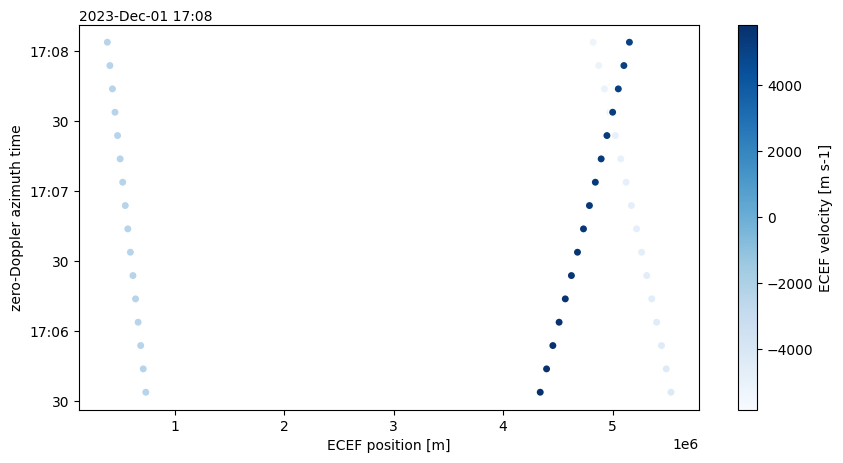

In [9]:
orbit.plot.scatter(y="azimuth_time", x="position", hue="velocity", cmap='Blues')

**Interpolate**

In [11]:
interp_orbit = orbit.interp_like(burst.azimuth_time)

**Plot**

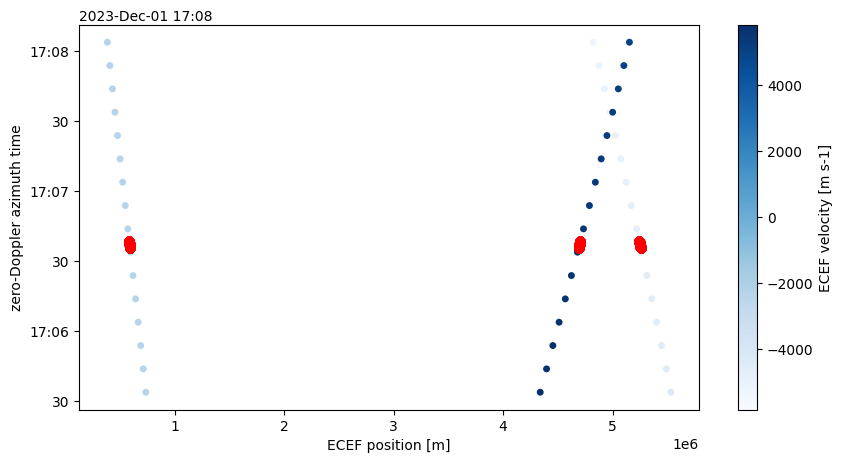

In [12]:
orbit.plot.scatter(y="azimuth_time", x="position", hue="velocity", cmap='Blues')
interp_orbit.plot.scatter(y="azimuth_time", x="position", color="red")

### Calibration
**Open Calibration lut data**

In [13]:
calibration_lut = xr.open_dataset(remote_product_path_1, group=f"quality/calibration", engine="zarr")

**Calibrate Data**

In [14]:
calibration_matrix = calibration_lut.interp_like(burst)
calibrated_measurement = burst / calibration_matrix["sigma_nought"]

**Plot Full Data**

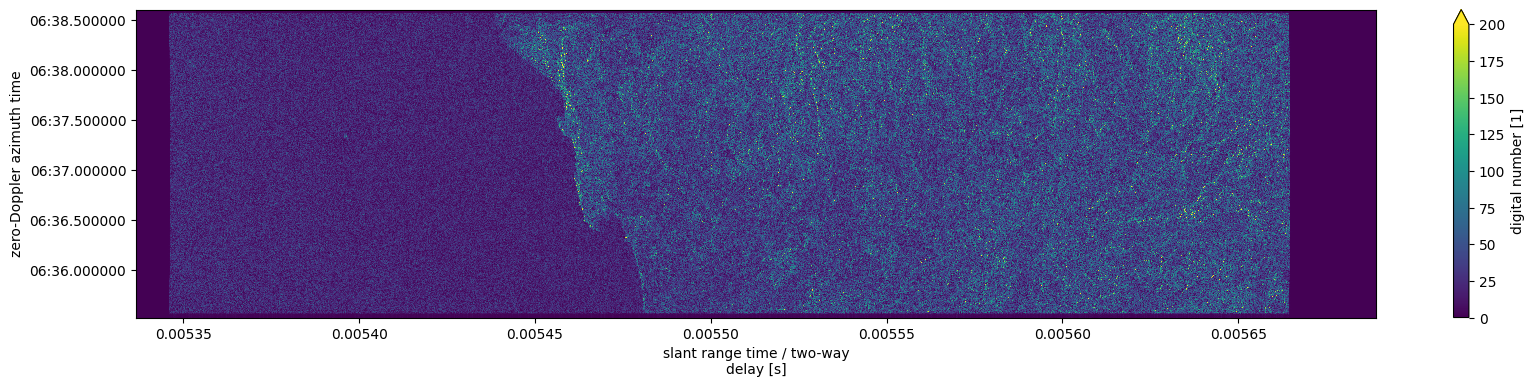

In [15]:
plt.figure(figsize=(20, 4))
_ = abs(burst).plot(y="azimuth_time", vmax=200)

### Geocoding using GCPs
**Open GCP Data**

In [16]:
gcp = xr.open_dataset(remote_product_path_1, group=f"conditions/gcp", engine="zarr")

**Interpolate and assign new geographic coordinates**

In [17]:
gcp_iterpolated = gcp.interp_like(burst)
burst = burst.assign_coords({"latitude": gcp_iterpolated.latitude, "longitude": gcp_iterpolated.longitude})

**Plot Subset**

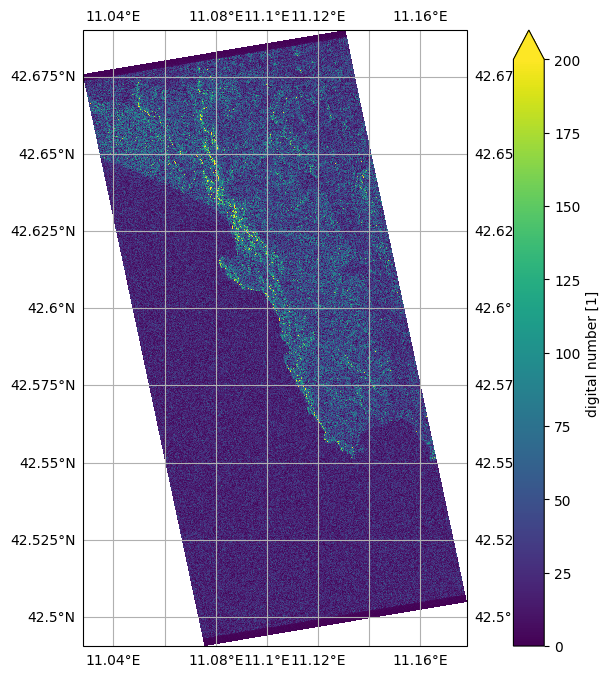

In [18]:
import cartopy.crs as ccrs
_, ax = plt.subplots(subplot_kw={"projection": ccrs.Miller()}, figsize=(12, 8))
gl = ax.gridlines(draw_labels=True,crs=ccrs.PlateCarree(), x_inline=False, y_inline=False)
abs(burst[:, 7000:9000]).plot(
    ax=ax, 
    transform=ccrs.PlateCarree(),
    x="longitude", 
    y="latitude",
    vmax=200
)

### RGB Plot of two non coregistred burst

The RBG plot shows the shift between the non coregistred bursts

- swath:IW1
- polarization:VH
- burst_id:249411
- burst acquisition date:
    - 2023-12-01
    - 2023-11-19
 
**Open Data**

In [19]:
slc_1 = xr.open_dataset(remote_product_path_1, group=f"measurements", engine="zarr")["slc"]
slc_2 = xr.open_dataset(remote_product_path_2, group=f"measurements", engine="zarr")["slc"]

amp_1 = np.abs(slc_1).drop_vars(["azimuth_time", "slant_range_time"])
amp_2 = np.abs(slc_2).drop_vars(["azimuth_time", "slant_range_time"])

**Compose RGB**

In [20]:
rgb = xr.concat([amp_1, amp_2, amp_2], dim="rgb")
rgb = xr.where(rgb > 200, 200, rgb) / 200

**Plot Subset**

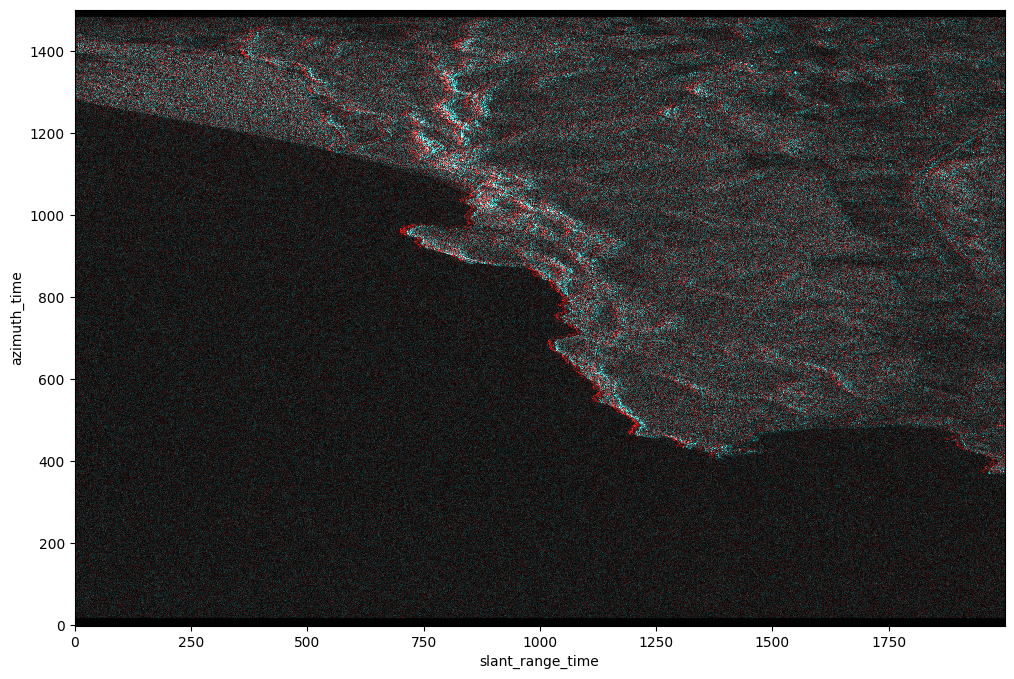

In [21]:
plt.figure(figsize=(12, 8))
rgb[:, :, 7000:9000].plot.imshow(rgb="rgb")